# Solar Flare Dataset
The solar flare dataset, available at the UCI Machine Learning Repository, offers valuable insights into the characteristics and classifications of solar flares. Solar flares are sudden bursts of energy released from the Sun's surface, and their study is crucial for understanding solar activity and its impact on our planet. This dataset comprises features extracted from different types of flares, such as their duration, peak flux, and location on the Sun's surface. It serves as a comprehensive resource for researchers and data scientists interested in solar physics, space weather forecasting, and related fields. By exploring this dataset, we can gain a deeper understanding of the complex nature of solar flares and uncover patterns that can help improve our knowledge of these powerful astronomical phenomena.

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Define the file on which we're operating and the names of the columns because they're not provided

In [2]:
dataset1 = "flare.data1"
dataset2 = "flare.data2"

headers = ["Class", "Largest Spot", "Spot Distribution", "Activity", "Evolution", "Previous Activity", "Complex",
           "Complex On Path", "Area", "Largest Spot Area", "C-Class", "M-Class", "X-Class"]

# importing dataset
df = pd.read_csv(dataset1, sep=" ", header=None, skiprows=1, names=headers)
df2 = pd.read_csv(dataset2, sep=" ", header=None, skiprows=1, names=headers)
df = pd.merge(df, df2, how="outer")

## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3247 entries, 0 to 3246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Class              3247 non-null   object
 1   Largest Spot       3247 non-null   object
 2   Spot Distribution  3247 non-null   object
 3   Activity           3247 non-null   int64 
 4   Evolution          3247 non-null   int64 
 5   Previous Activity  3247 non-null   int64 
 6   Complex            3247 non-null   int64 
 7   Complex On Path    3247 non-null   int64 
 8   Area               3247 non-null   int64 
 9   Largest Spot Area  3247 non-null   int64 
 10  C-Class            3247 non-null   int64 
 11  M-Class            3247 non-null   int64 
 12  X-Class            3247 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 355.1+ KB


In [4]:
df.describe()

,Activity,Evolution,Previous Activity,Complex,Complex On Path,Area,Largest Spot Area,C-Class,M-Class,X-Class
count,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000
mean,1.063443,2.672929,1.038497,1.167539,1.954111,1.011087,1.075146,0.110872,0.028950,0.004004
std,0.243796,0.526164,0.267452,0.373514,0.209276,0.104726,0.263668,0.512952,0.233697,0.067860
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,2.000000


array([[<Axes: title={'center': 'Activity'}>,
        <Axes: title={'center': 'Evolution'}>,
        <Axes: title={'center': 'Previous Activity'}>],
       [<Axes: title={'center': 'Complex'}>,
        <Axes: title={'center': 'Complex On Path'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Largest Spot Area'}>,
        <Axes: title={'center': 'C-Class'}>,
        <Axes: title={'center': 'M-Class'}>],
       [<Axes: title={'center': 'X-Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

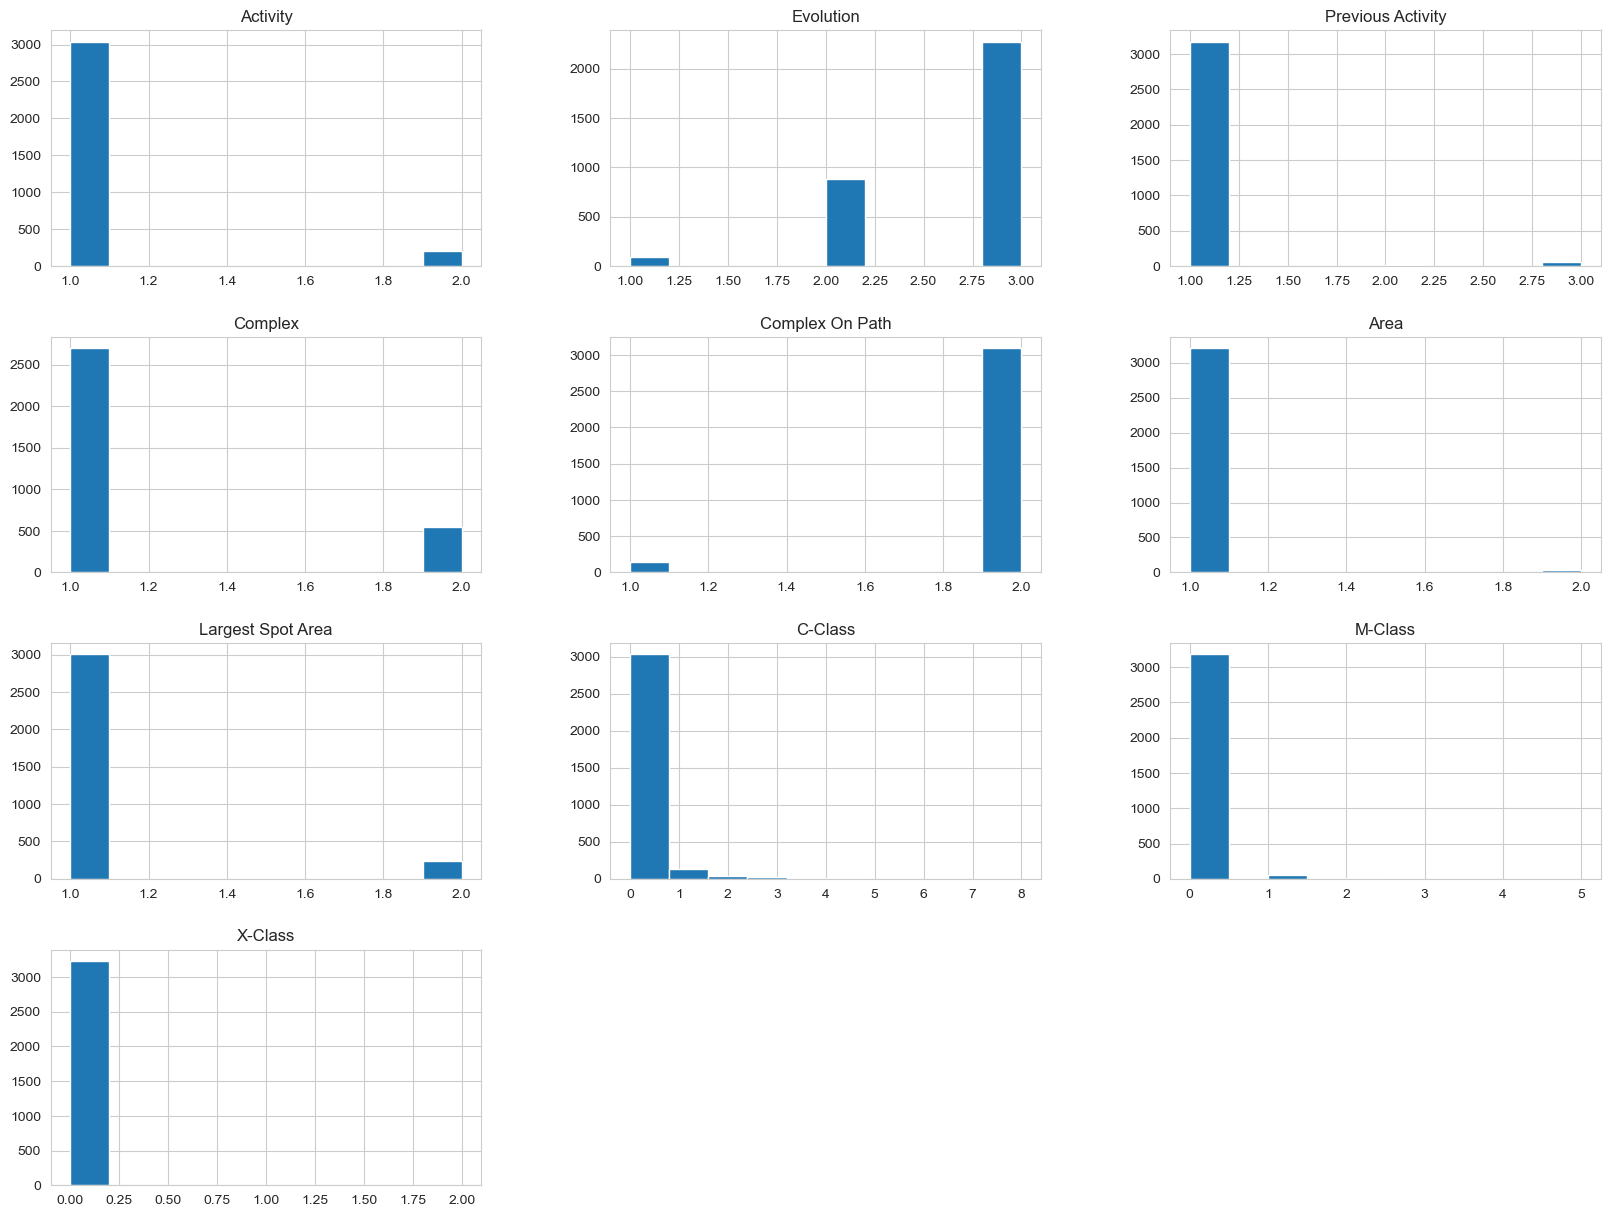

In [5]:
df.hist(figsize=(20, 15))

## Data Preprocessing
- Check for missing values (there shouldn't be any)
- Transform categorical data into numerical data

### Check for missing values

In [6]:
df.isnull().any()

Class                False
Largest Spot         False
Spot Distribution    False
Activity             False
Evolution            False
Previous Activity    False
Complex              False
Complex On Path      False
Area                 False
Largest Spot Area    False
C-Class              False
M-Class              False
X-Class              False
dtype: bool

In [7]:
df["Class"].unique()

array(['C', 'D', 'B', 'F', 'H', 'E'], dtype=object)

In [8]:
df["Largest Spot"].unique()

array(['S', 'A', 'K', 'R', 'X', 'H'], dtype=object)

In [9]:
df["Spot Distribution"].unique()

array(['O', 'I', 'X', 'C'], dtype=object)

### Transform categorical data into numerical data
Since the models we're going to use require numerical data, we need to transform the categorical data into numerical data. We're going to use the OrdinalEncoder from sklearn to do this.

In [10]:
encoder = OrdinalEncoder()
for col in ["Class", "Largest Spot", "Spot Distribution"]:
    df[col] = encoder.fit_transform(df[col].values.reshape(-1, 1))
    df[col] = df[col].astype("int")
df

,Class,Largest Spot,Spot Distribution,Activity,Evolution,Previous Activity,Complex,Complex On Path,Area,Largest Spot Area,C-Class,M-Class,X-Class
0,1,4,2,1,2,1,1,2,1,2,0,0,0
1,1,4,2,1,2,1,1,2,1,2,0,0,0
2,1,4,2,1,2,1,1,2,1,2,0,0,0
3,1,4,2,1,2,1,1,2,1,2,0,0,0
4,1,4,2,1,2,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,2,1,2,1,2,1,2,2,1,1,0,0,0
3243,2,0,1,2,3,2,1,2,1,1,0,0,0
3244,3,0,2,1,2,1,2,2,1,1,4,1,0
3245,5,4,3,1,3,1,1,1,1,1,1,0,0


## Exploratory Data Analysis
### Boxplot

<Axes: >

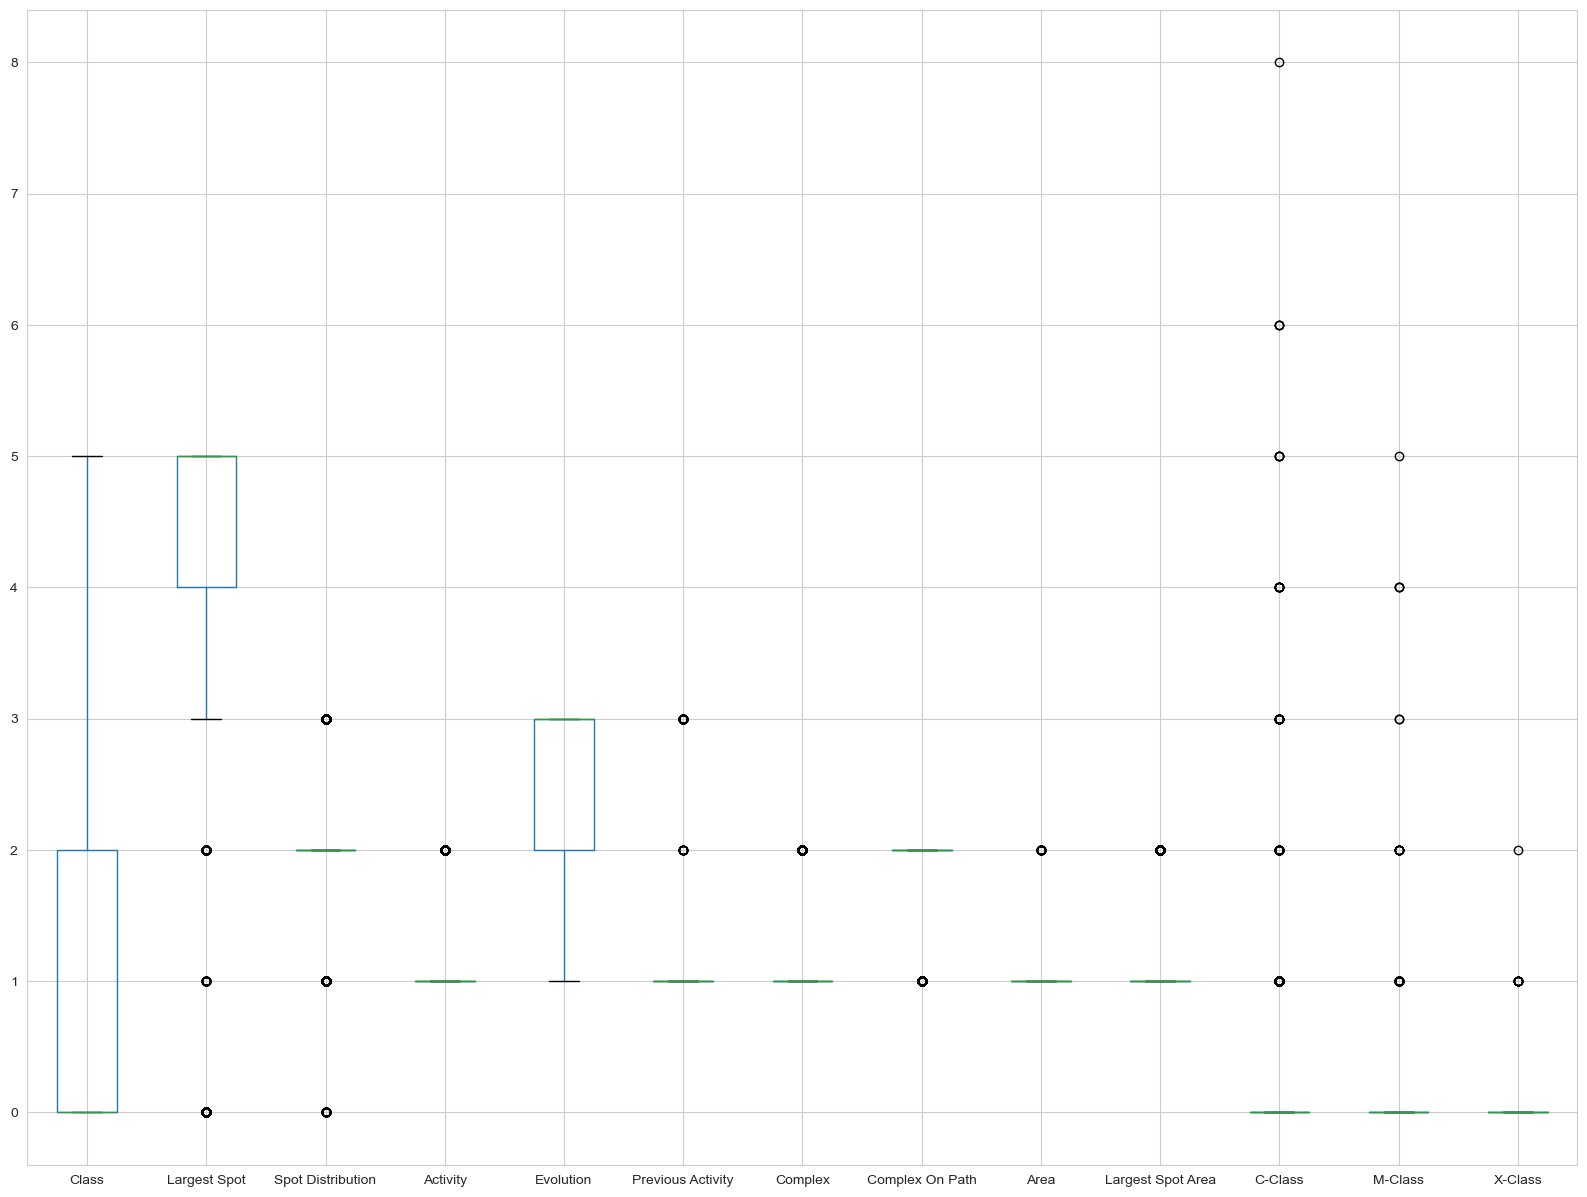

In [11]:
df.boxplot(figsize=(20, 15))

### Correlation Matrix

<Axes: >

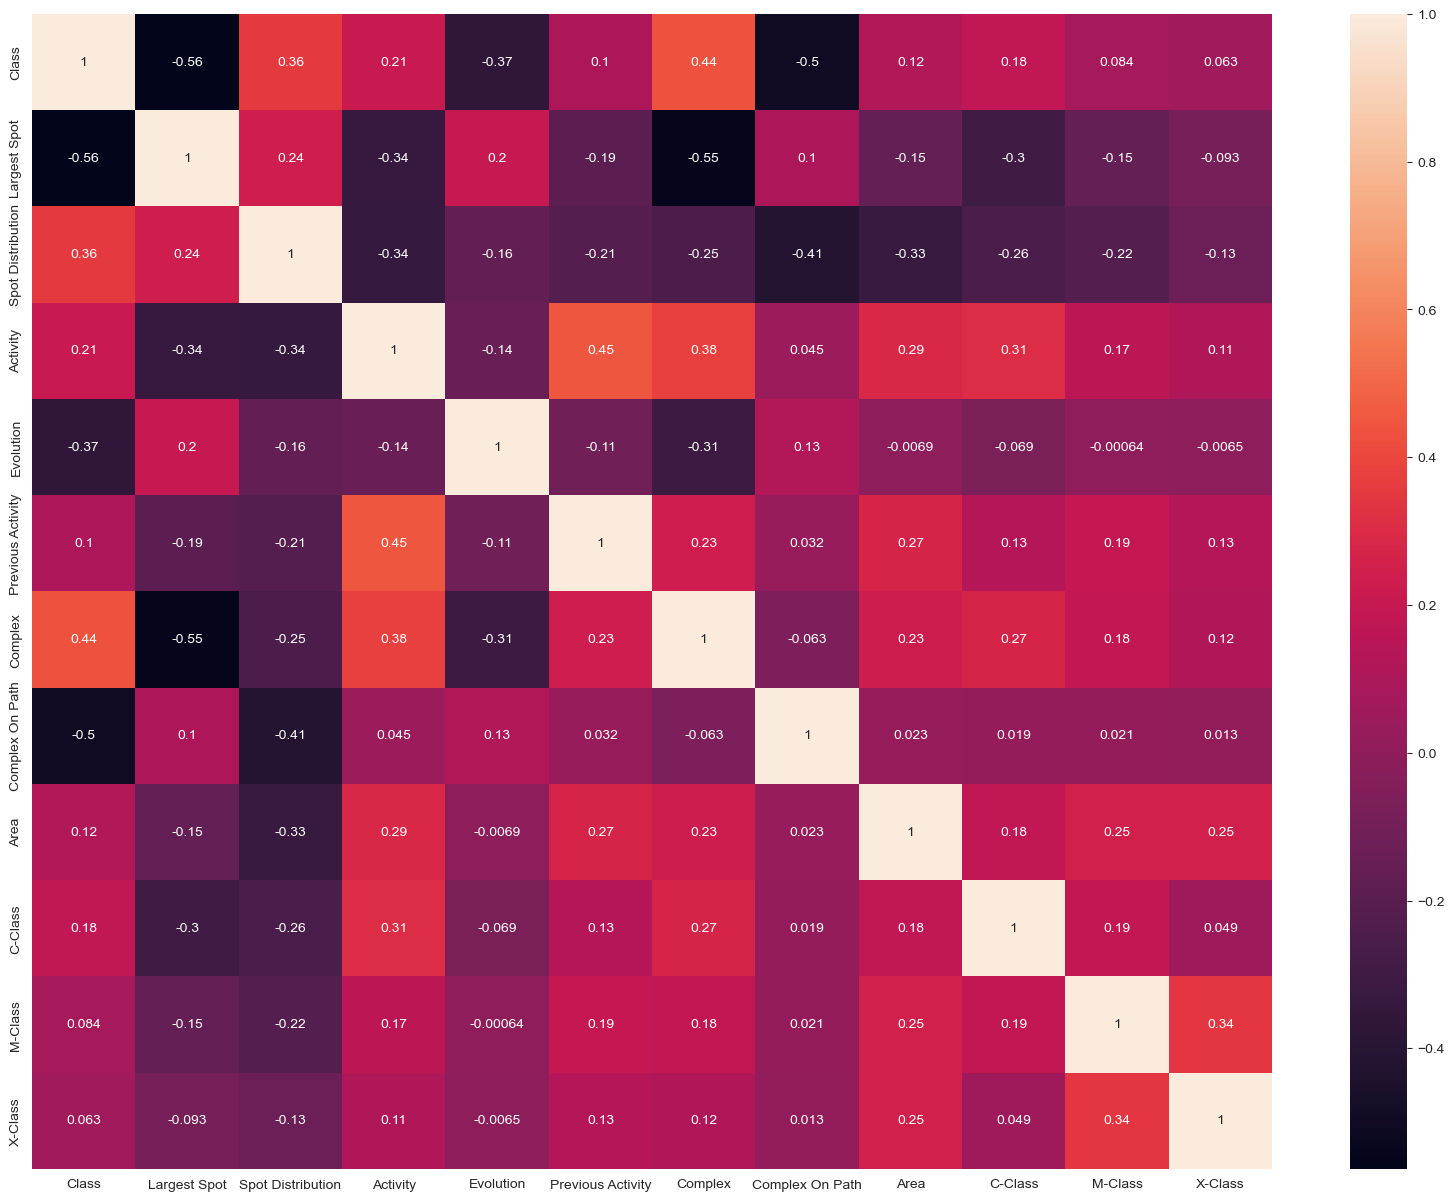

In [12]:
corr = df.drop(columns=["Largest Spot Area"]).corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

## PCA and K-Means

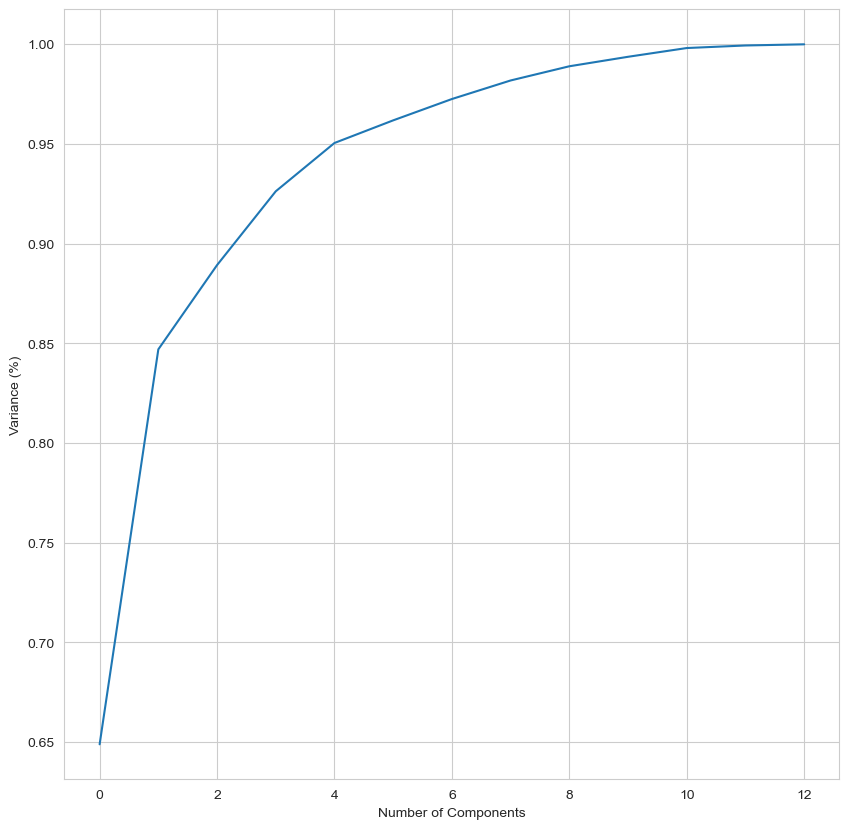

In [13]:
pca = PCA().fit(df)
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.show()

# We can see that with 3 components we can explain more than 90% of the variance

In [14]:
K = 3
scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)

In [15]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=K, init='random', n_init=1)
kmeans_model.fit(data_scaled)
y = kmeans_model.labels_

pca = PCA(n_components=3)
pca_coordinates = pca.fit_transform(data_scaled)
pca_centroids = pca.transform(kmeans_model.cluster_centers_)

In [16]:
silhouette_avg = round(silhouette_score(data_scaled, y), 5)
sample_silhouette_values = silhouette_samples(data_scaled, y)

print(f'Overall Clustering Silhouette {silhouette_avg}')

Overall Clustering Silhouette 0.53687


overall clustering silhouette 0.5368704749857126


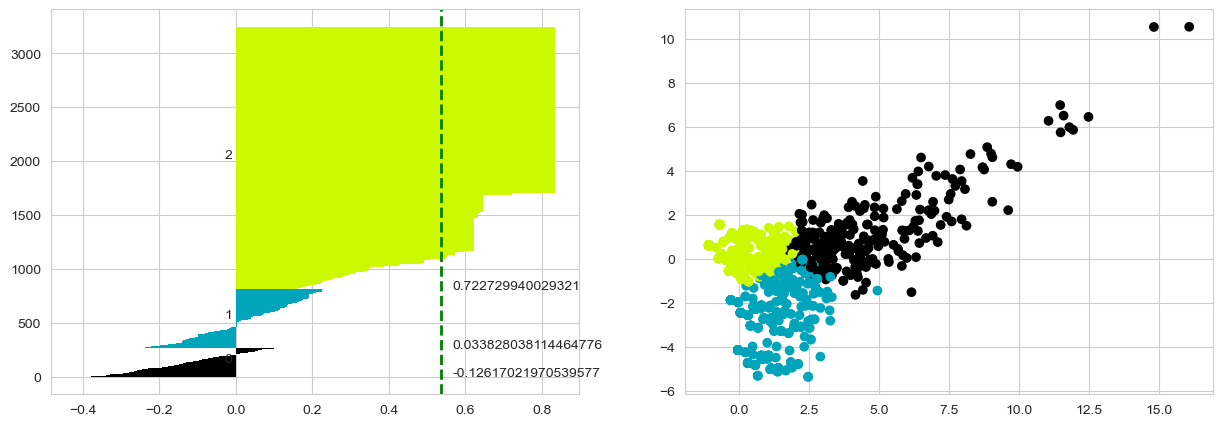

In [17]:
from matplotlib import cm

silhouette_avg = silhouette_score(data_scaled, y)
sample_silhouette_values = silhouette_samples(data_scaled, y)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0
y_upper = 0
for i,cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = sample_silhouette_values[y == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, edgecolor='none', color=cm.nipy_spectral(float(i) / K))
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(y.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)

## Predicting the largest spot area using Decision Trees

(2272, 9)
Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}
training accuracy 0.9375
testing accuracy 0.9364102564102564


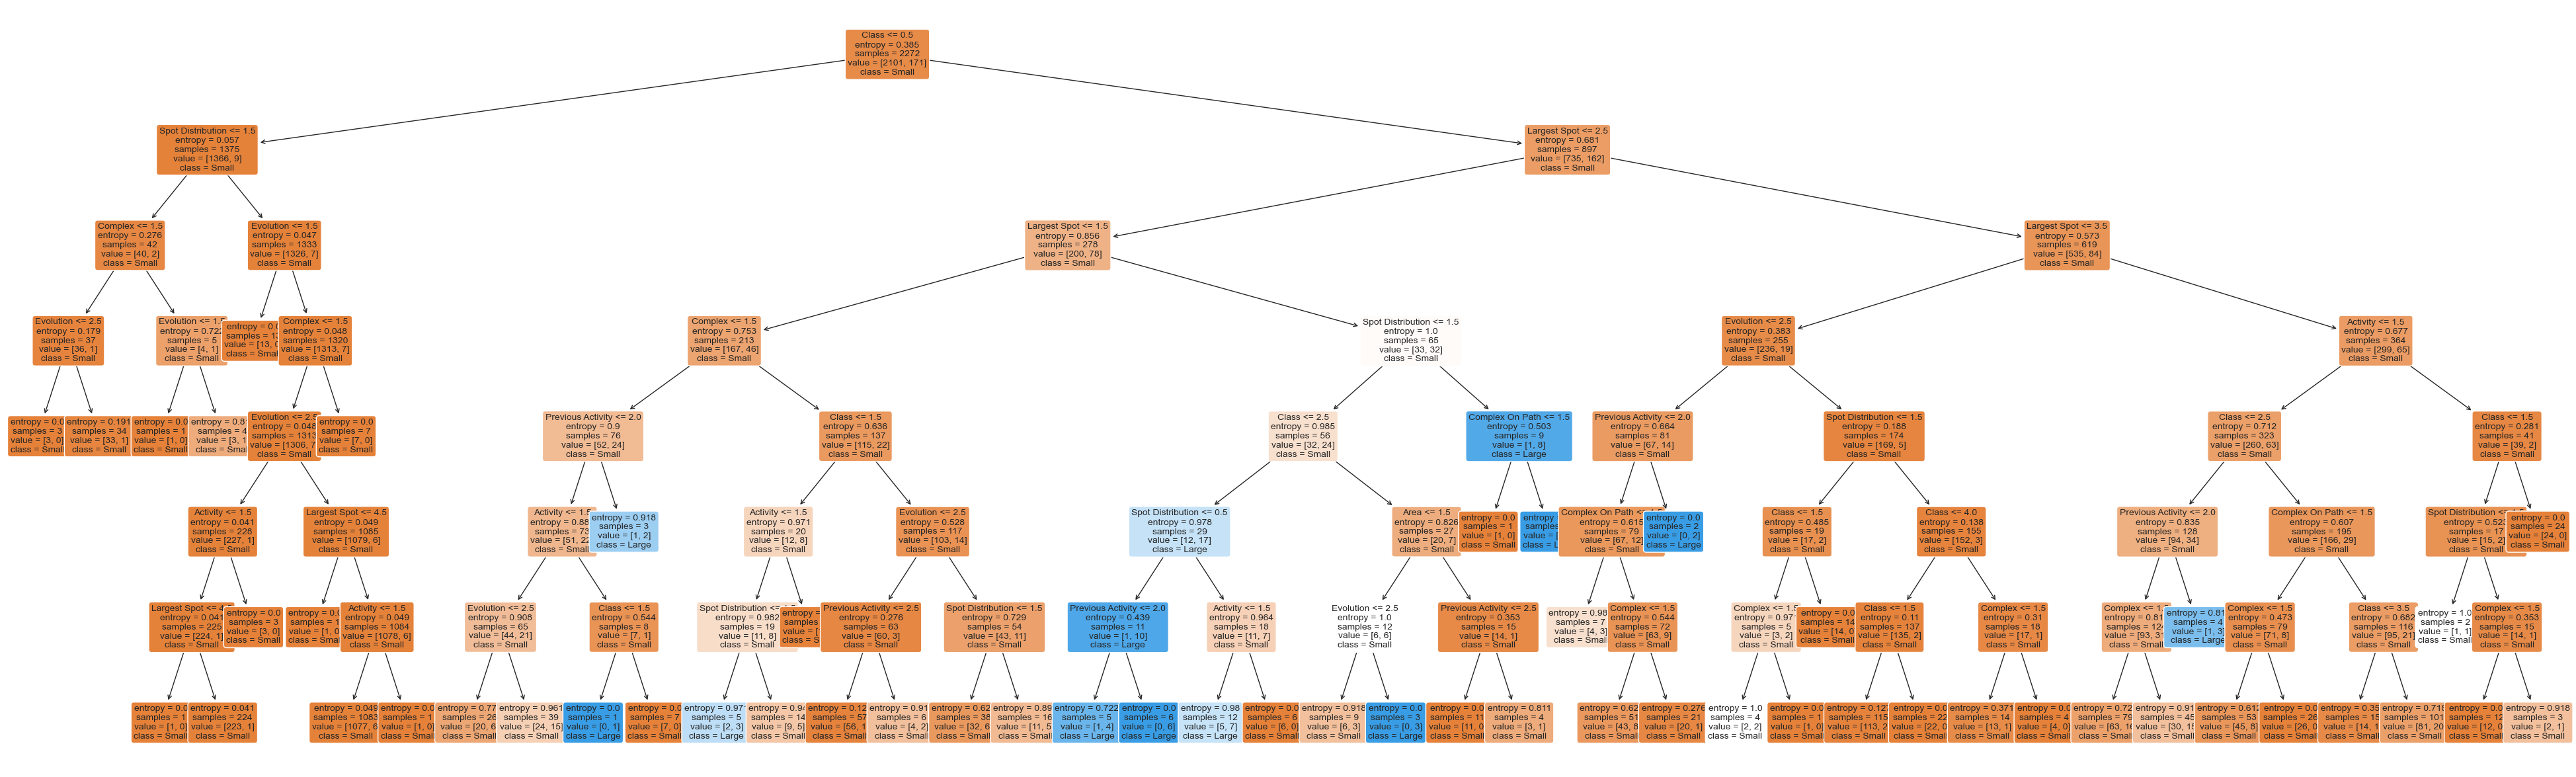

In [18]:
X = df.drop(columns=["Largest Spot Area", "C-Class", "M-Class", "X-Class"])
y = df["Largest Spot Area"]

np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=11)
print(X_train.shape)

decision_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

tree_model = DecisionTreeClassifier()

tree_model = GridSearchCV(tree_model, decision_grid, cv=5, n_jobs=-1, verbose=1)
tree_model.fit(X_train, y_train)
print(tree_model.best_params_)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\ntesting accuracy {testing_acc}')

fig, ax = plt.subplots(figsize=(50, 15))
plot_tree(tree_model.best_estimator_,
            ax=ax,
            fontsize=10,
            feature_names=X.columns,
            class_names=["Small", "Large"],
            filled=True,
            rounded=True)
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted_test)

array([[899,   3],
       [ 59,  14]], dtype=int64)

## Predicting the largest spot area using SVM

In [20]:
svm_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_model = SVC()
svm_model = GridSearchCV(svm_model, svm_grid, cv=5, n_jobs=-1, verbose=1)
svm_model.fit(X_train, y_train)
print(svm_model.best_params_)
y_predicted_train = svm_model.predict(X_train)
y_predicted_test = svm_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\ntesting accuracy {testing_acc}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10, 'gamma': 0.1}
training accuracy 0.9339788732394366
testing accuracy 0.9343589743589743


In [21]:
confusion_matrix(y_test, y_predicted_test)

array([[901,   1],
       [ 63,  10]], dtype=int64)

## Predicting the largest spot area using Neural Networks

In [24]:
mlp_grid = { 'hidden_layer_sizes': [(10,10,10), (20,20,20), (30,30,30)],
             'alpha': [0.0001, 0.05],
             'learning_rate': ['constant','adaptive'],
             }
mlp_model = MLPClassifier()
mlp_model = GridSearchCV(mlp_model, mlp_grid, cv=5, n_jobs=-1, verbose=1)
mlp_model.fit(X_train, y_train)
y_predicted_train = mlp_model.predict(X_train)
y_predicted_test = mlp_model.predict(X_test)
training_acc = round(accuracy_score(y_train, y_predicted_train), 3)
testing_acc = round(accuracy_score(y_test, y_predicted_test), 3)
print(f'training accuracy {training_acc}\ntesting accuracy {testing_acc}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
training accuracy 0.933
testing accuracy 0.92


In [23]:
confusion_matrix(y_test, y_predicted_test)

array([[896,   6],
       [ 68,   5]], dtype=int64)